# Système à temps discrets 1D

In [139]:
# import useful python packages
import numpy as np # for vector and matrix manipulations
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting nicer

sb.set_theme(context="notebook", style="ticks")

## Fonctions utiles

In [145]:
# Integrate the logistic map
def integrate(f, x0, n_times, map_params=()):
    solution = np.zeros(n_times+1)
    solution[0] = x0
    for it in range(1, n_times+1):
        solution[it] = f(solution[it-1], *map_params)
    return solution


def plot_cobweb(f, x0, n_times, vmin=0, vmax=1, ax=None, map_params=()):

    if ax is None:
        ax = plt.gca()
    ax.set_aspect("equal")
    

    # draw map
    x = np.linspace(vmin, vmax, 500)
    y = np.array([f(xi, *map_params) for xi in x])
    ax.plot(x, y, color='k', label="map", zorder=-1)

    # draw diagonal
    ax.plot(x, x, ls='--', c="k", zorder=-2)

    # draw cobweb
    xn = x0
    for i in range(n_times):  # Use fewer iterations for clarity
        ax.plot([xn, xn], [xn, f(xn, *map_params)], c="b", alpha=0.6)
        ax.plot([xn, f(xn, *map_params)], [f(xn, *map_params), f(xn, *map_params)], c="b", alpha=0.8)

        if i==n_times-1:
            ax.plot([f(xn, *map_params)], [f(xn, *map_params)], "bo", mfc="w", alpha=0.8)
        
        xn = f(xn, *map_params)


    ax.set_xlabel("$x_n$")
    ax.set_ylabel("$x_{n+1} = f(x_n)$")

    return ax 

## Exemple simple

In [146]:
def square_map(x):
    return x**2

In [147]:
# Parameters
x0 = 0.9

n_times = 10

# integrate the system
solution = integrate(square_map, x0, n_times)

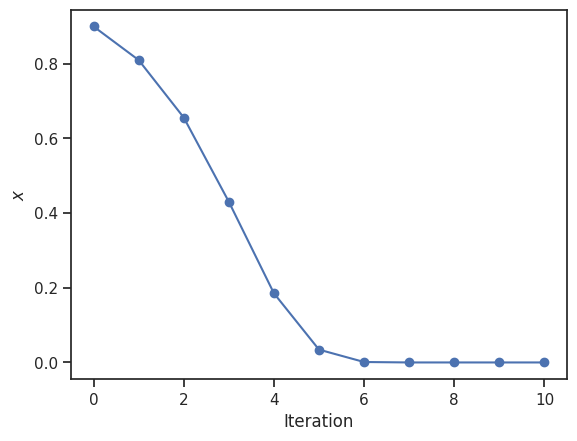

In [148]:
# Visualization
fig, ax = plt.subplots()

ax.plot(range(n_times+1), solution, "o-")
ax.set_xlabel("Iteration")
ax.set_ylabel("$x$")

plt.show()

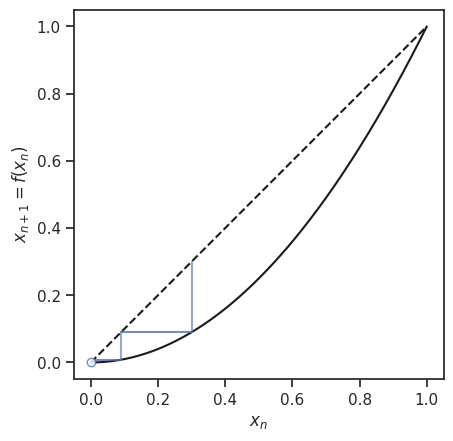

In [149]:
x0 = 0.3
n_times = 100

plot_cobweb(square_map, x0, n_times)

plt.show()

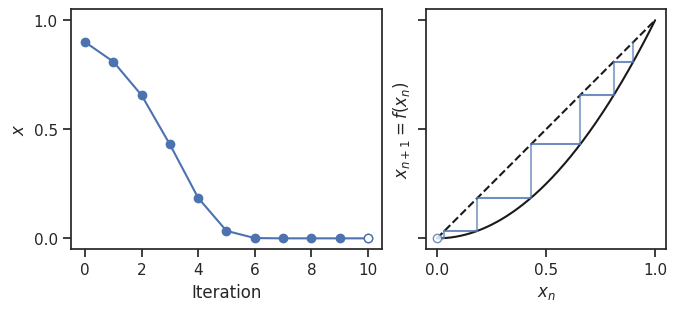

In [150]:
x0 = 0.9
n_times = 10

# integrate the system
solution = integrate(square_map, x0, n_times)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, layout="constrained", figsize=(7, 3)) #, width_ratios=(2, 1))

ax1.plot(range(n_times+1), solution, "o-")
ax1.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")
ax1.set_yticks([0, 0.5, 1])

ax1.set_xlabel("Iteration")
ax1.set_ylabel("$x$")

plot_cobweb(square_map, x0, n_times, ax=ax2)
ax2.set_xticks([0, 0.5, 1])

plt.savefig("square_map.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)

plt.show()

## Application logistique

In [151]:
def logistic_map(x, r=1):
    return r * x * (1 - x)

In [152]:
# Parameters
x0 = 0.2
n_times = 150

r = 0.9
args = (r, )

# integrate the system
solution = integrate(logistic_map, x0, n_times, args)

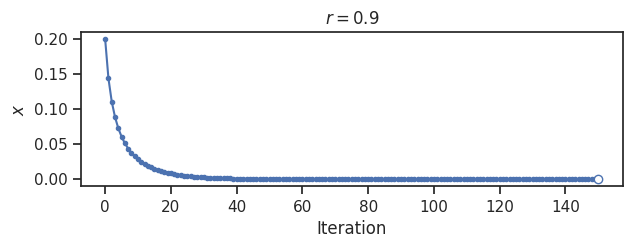

In [153]:
# Visualization
fig, ax = plt.subplots(figsize=(7, 2))

ax.plot(range(n_times+1), solution, "o-", ms=3)
ax.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")

ax.set_xlabel("Iteration")
ax.set_ylabel("$x$")

ax.set_title(f"$r={r}$")

plt.savefig(f"logistic_map_r_{r}_timeseries.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)

plt.show()

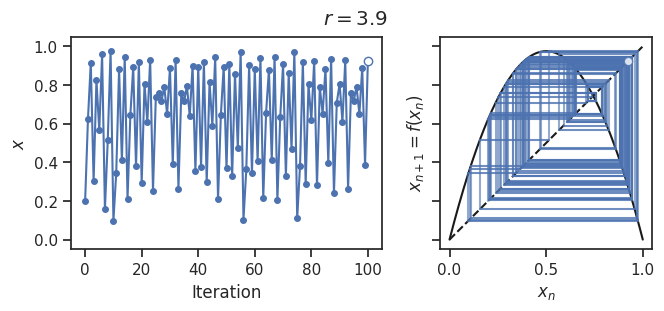

In [171]:
x0 = 0.2
n_times = 100

r = 3.9
args = (r, )

# integrate the system
solution = integrate(logistic_map, x0, n_times, args)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, layout="constrained", figsize=(7, 3)) #, width_ratios=(2, 1))

ax1.plot(range(n_times+1), solution, "o-", ms=4)
ax1.plot(range(n_times+1)[-1], solution[-1], "bo-", mfc="w")

ax1.set_xlabel("Iteration")
ax1.set_ylabel("$x$")

plot_cobweb(logistic_map, x0, n_times, map_params=args, ax=ax2)

plt.suptitle(f"$r={r}$")

plt.savefig(f"logistic_map_r_{r}.png", dpi=250, transparent=True, bbox_inches="tight", pad_inches=0.1)


plt.show()